In [4]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [5]:
def f2(x): #Här skapar vi en testfunktion 
    return x**2

def los2(x,alpha,beta,L): #Här definierar vi den exakta lösningen till ovanstående testfunktion
    return (x**4)/12 + (beta - alpha - (L**4)/12)*x/L + alpha


In [ ]:
def twopBVP(fvec, alpha, beta, L, N):
    deltaX = L/(N+1)
    T = np.eye(N)*(-2) 
    for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
        T[i+1,i] = 1
        T[i, i+1] = 1
    T = T/(deltaX**2)
    y = np.linalg.inv(T)@fvec
    y = np.insert(y, 0, alpha)
    y = np.append(y,beta)
    
    return  y #Detta löser ekvationen och spottar ut en vektor innehållande y(i). 

def solve(f,alpha, beta, L, N): #Tanken är att denna ska generera högerledet som man sedan stoppar in i twopBVP för att lösa. 
    deltaX = L/(N+1)

    Xvec = np.linspace(0,L,N+2)
    fvec = f(Xvec[1:N+1]) #Fyller fvec med funktionsvärdena F(x1) till F(xN-1)
    
    fvec[0] += -alpha/(deltaX**2) #Första och sista elementet i fvec fixar vi manuellt. 
    fvec[-1] += -beta/(deltaX**2)

    return fvec, Xvec

    


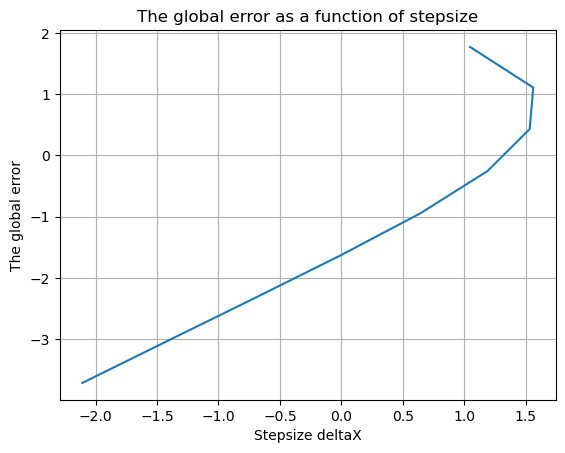

In [10]:
def errVSh(f,alpha, beta, L, N):
    Nvec = [int(np.power(2,i)) for i in range(4, 13)]
    err = np.zeros(len(Nvec))

    for i in range(0, len(Nvec)):
        y, x = solve(f, alpha, beta, L, Nvec[i])
        y_an = np.zeros(((Nvec[i]+1), 1))  #Skapar en vektor för den exakta lösningen
        j=0
        for j in range(Nvec[i]+1):
            y_an[j] = los(x[j], alpha, beta, L)  #Fyller vektorn med den exakta lösningen
        err[i] = np.sqrt(L/(Nvec[i]+1)) * la.norm(y-y_an) #Beräknar RMS med norm *(delta x)^2 

    deltaX=np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        deltaX[i] = L / (Nvec[i] +1)
    plt.grid()
    plt.xlabel("Stepsize deltaX")
    plt.ylabel("The global error")
    plt.title("The global error as a function of stepsize")
    #plt.loglog(deltaX, err, 'r')
    return np.log(err), np.log(deltaX)

alpha, beta, L, N = 3, 8, 100, 200

x, y = errVSh(f, alpha, beta, L, N)  #Vi verkar bara få ordo 1? Har vi missuppfattat något? 
plt.plot(x, y)

In [8]:
# alpha, beta, L, N = 3, -5, 50, 200

# deltaX = L/(N+1)
# y, x = solve(f, alpha, beta, L, N)

# y_an = np.zeros(((N+1), 1))
# for i in range(N+1):
#     y_an[i] = los(x[i], alpha, beta, L)

# xlog = np.log(x)
# errlog = np.log(np.abs(y-y_an))


# err = np.sqrt(deltaX) * la.norm(y-y_an)

# plt.loglog(x, err)
# plt.plot(x, y)
# plt.plot(x, y_an)
# plt.plot(x, np.zeros_like(y))
#plt.plot(xlog[0:N], errlog[0:N])

## Task 1.2

In [ ]:
f = f2
alpha = 4
beta = -100
N = 100
L = 10
fvec, Xvec = fvecgen(f, alpha, beta, L, N)
y = twopBVP(fvec, alpha, beta, L, N)

plt.plot(Xvec, y)
plt.plot(Xvec, los2(Xvec,alpha,beta,L), '--')


In [ ]:
f = f2
Nvec = np.linspace(3,12,10).astype(int)
Nvec = 2**Nvec
errorvec = []
hvec = []
for N in Nvec:
    fvec, Xvec = fvecgen(f, alpha, beta, L, N)
    y = twopBVP(fvec, alpha, beta, L, N)
    deltaX = L/(N+1)
    errorvec.append(np.sqrt(deltaX)*la.norm(y - los2(Xvec,alpha,beta,L)))
 
    hvec.append(deltaX)

plt.figure()
plt.plot(np.log(hvec), np.log(errorvec))
plt.plot(np.log(hvec), 2 * np.log(hvec) + np.log(errorvec[0]) - 2*np.log(hvec[0]), '--')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['Our error', 'h^2'])
plt.title('Proving that the error is O(h^2)')


In [ ]:
E = 1.9e+11
L = 10 
alpha, beta = 0,0
N = 999 
q = -50000

def I(x):
    return 1e-3*(3-2*np.cos(np.pi*x/L)**12) 

Xvec = np.linspace(0,L,N+2)
Q = np.ones((N, 1)) * q
M = twopBVP(Q, alpha, beta,  L, N)

MEIvec = M[1:N+1]/(E*I(Xvec[1:N+1]))

U = twopBVP(MEIvec, alpha, beta,  L, N)  

plt.grid()
plt.plot(Xvec, U*1e3) #Förlänger med 1000 för att det ska ses lite tydligare 
plt.xlabel("x-coordinate (meter)")
plt.ylabel("Calculated Deflection in mm")
plt.title('Deflection as a function of position')

print("The deflection at the midpoint of the steelbeem is equal to " + str(1e3 * U[500]) + " mm")